In [1]:
import pandas as pd
import numpy as np

In [12]:
df=pd.read_csv("C:/Users/Administrateur.LAPTOP-FH8TB47B/Desktop/Projet_assemblee/liste_mandatdef.csv") 
df_depu=pd.read_csv("C:/Users/Administrateur.LAPTOP-FH8TB47B/Desktop/Projet_assemblee/table_depute.csv")
#on récupère le csv de la liste des mandats

#### Analyse des NAN

Les nan de département sont très majoitairement issu de la révolution :

In [3]:
df[df['Département'].isna()].count()

Unnamed: 0          197
Département           0
Groupe              190
Législature         197
Mandat              197
Régime politique    195
Nom                 197
dtype: int64

In [8]:
df[df['Département'].isna()][df['Régime politique']!='Révolution']

<ipython-input-8-1b31625295a1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Département'].isna()][df['Régime politique']!='Révolution']


,Unnamed: 0,Département,Groupe,Législature,Mandat,Régime politique,Nom
3591,0,NaN,Parti socialiste et radicaux de gauche,Ve législature,Du 2 avril 1973 au 2 avril 1978,Cinquième République - Assemblée nationale,Nicolas Alfonsi
7479,0,NaN,Union des démocrates pour la République,Ve législature,Du 2 avril 1973 au 2 avril 1978,Cinquième République - Assemblée nationale,Jean-Paul de Rocca-Serra
8630,0,NaN,Union des démocrates pour la République,Ve législature,Du 2 avril 1973 au 2 avril 1978,Cinquième République - Assemblée nationale,Jean Zuccarelli
26220,0,NaN,Droite,Assemblée nationale législative,Du 13 mai 1849 au 2 décembre 1851,Deuxième République,Alphée Bourdon de Vatry
27765,0,NaN,NaN,(Législature en cours),Depuis le 2 novembre 2020 (mandat en cours),NaN,"Joseph, François, Marie Kermorial"
30956,0,NaN,NaN,Chambre des députés des départements,Du 4 juin 1814 au 20 mars 1815,Première Restauration,"Maurice, Gabriel, Joseph de Riquet de Caraman"
32018,0,NaN,NaN,Corps législatif,Du 25 décembre 1799 au 20 mars 1803,Consulat et Premier Empire,"François, Régis, Benjamin Devinck-Thiery"
33554,0,NaN,NaN,Ire législature,Du 7 octobre 1815 au 5 septembre 1816,Seconde Restauration - Chambre des députés des...,Denis Le Maréchal
34781,0,NaN,NaN,(Législature en cours),Depuis le 2 novembre 2020 (mandat en cours),NaN,"Emmanuel, Joseph Sieyès"
35060,0,NaN,NaN,Chambre des députés des départements,Du 4 juin 1814 au 20 mars 1815,Première Restauration,Sigismond Moreau de Delémont


Pour les régime politique, on a les cas super-pathologique + des personnes de cette législature un peu perdu

In [5]:
df[df['Régime politique'].isna()]

,Unnamed: 0,Département,Groupe,Législature,Mandat,Régime politique,Nom
27765,0,NaN,NaN,(Législature en cours),Depuis le 2 novembre 2020 (mandat en cours),NaN,"Joseph, François, Marie Kermorial"
34781,0,NaN,NaN,(Législature en cours),Depuis le 2 novembre 2020 (mandat en cours),NaN,"Emmanuel, Joseph Sieyès"


La ce n'est que les cas super pathologiques => Ils n'existent plus !

In [6]:
df[df['Mandat'].isna()]

,Unnamed: 0,Département,Groupe,Législature,Mandat,Régime politique,Nom


On a beaucoup de nan dans les groupes mais c'est plus normal.

In [7]:
df[df['Groupe'].isna()].count()

Unnamed: 0          4123
Département         4116
Groupe                 0
Législature         4123
Mandat              4123
Régime politique    4121
Nom                 4123
dtype: int64

In [30]:
df_depu[df_depu["Né le"].isna()][df_de]

,Unnamed: 0,Unnamed: 0.1,Nom,Né le,Département de naissance,Département de mort,nombre de mandat,age en année,premier dpt,élection locale
4424,4424,4424,Pierre André,NaN,Meurthe,Inconnu,10.0,-105.533196,Meurthe-et-Moselle,False
4425,4425,4425,Pierre André,NaN,Inconnu,Inconnu,10.0,-105.533196,Meurthe-et-Moselle,False
6302,6302,6302,Pierre Michel,NaN,Côtes,Côtes,6.0,-81.007529,Côtes-du-Nord,False
6303,6303,6303,Pierre Michel,NaN,Inconnu,Inconnu,6.0,-81.007529,Côtes-du-Nord,False
16333,16333,16333,Charles Devroé,NaN,Inconnu,Inconnu,0.0,NaN,Départements de l'Empire français aujourd'hui...,False
...,...,...,...,...,...,...,...,...,...,...
16495,16495,16495,Bertrand Dufresne,NaN,Paris,Inconnu,0.0,NaN,Basses-Pyrénées,False
16496,16496,16496,Jean-François Vidalat,NaN,Inconnu,Inconnu,0.0,NaN,Ariège,False
16497,16497,16497,Louis Bernard-Saint-Affrique,NaN,Aveyron,Inconnu,0.0,NaN,Aveyron,True
16498,16498,16498,"Louis, Gustave Doulcet de Pontécoulant",NaN,Calvados,Paris,0.0,NaN,Calvados,True


In [113]:
d=pd.DataFrame([int(x[-4:]) for x in df_depu[df_depu["Département de naissance"].isna()]["Né le"]])[0]

In [114]:
d.count()

524

<AxesSubplot:>

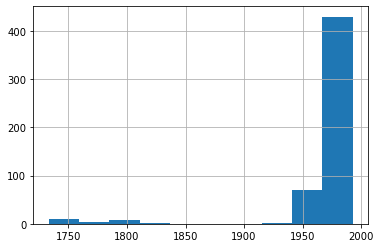

In [115]:
d.hist(bins=10)

In [80]:
a=df_depu[df_depu["Département de naissance"]=="Inconnu"].set_index("Nom").drop("Unnamed: 0",axis=1).drop("Unnamed: 0.1",axis=1)
a=a[~a["Né le"].isna()]["Né le"]

In [106]:
a.count()

2192

<AxesSubplot:>

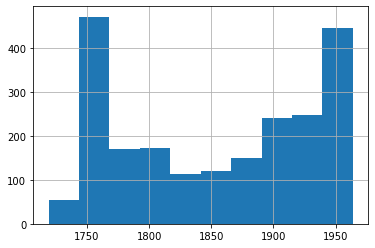

In [98]:
pd.DataFrame([int(x[-4:]) for x in a])[0].hist()